In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [5, 5]

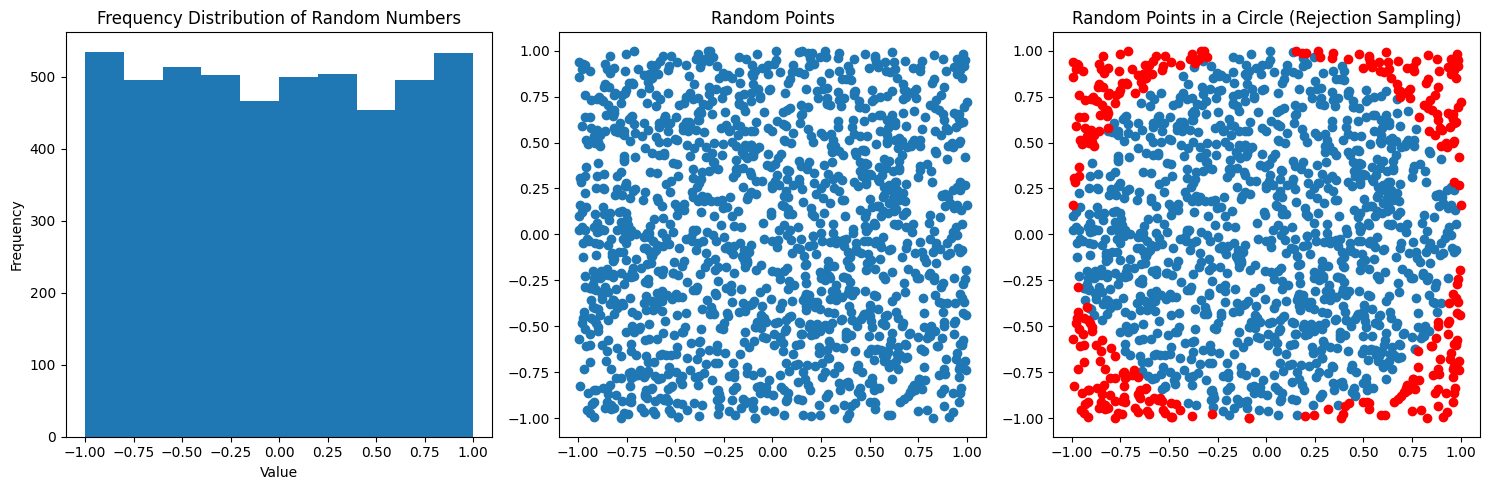

Had to throw out 323 points (21.533%)


In [ ]:
# Generate random numbers in a list (histogram)
random_list = np.random.uniform(-1.0, 1.0, 5000)



# Generate a bunch of random 2D points
num_points = 1500
rand_x = np.random.uniform(-1, 1, num_points)
rand_y = np.random.uniform(-1, 1, num_points)

# Take a sample of points within a unit circle (rejection sampling)
x_accepted = []
y_accepted = []
x_rejected = []
y_rejected = []

def distance(x, y):
    return np.sqrt(x**2 + y**2)

for x, y in zip(rand_x, rand_y):
    if (distance(x, y) <= 1):
        x_accepted.append(x)
        y_accepted.append(y)
    else:
        x_rejected.append(x)
        y_rejected.append(y)

num_tossed = len(x_rejected)
rejection_rate = (num_tossed / num_points) * 100

# Visualize the data
fig, diagrams = plt.subplots(1, 3, figsize=(15, 5))

# Uniform distirbution
diagrams[0].hist(random_list, bins=10)
diagrams[0].set_title('Frequency Distribution of Random Numbers')
diagrams[0].set_xlabel("Value")
diagrams[0].set_ylabel("Frequency")

# Random 2D points
diagrams[1].scatter(rand_x, rand_y)
diagrams[1].set_title('Random Points')

# Random 2D points in a cicrcle (our not)
diagrams[2].scatter(x_accepted, y_accepted)
diagrams[2].scatter(x_rejected, y_rejected, color='red')
diagrams[2].set_title('Random Points in a Circle (Rejection Sampling)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Other info
print(f'Had to throw out {num_tossed} points ({rejection_rate:0.5}%)')

In [ ]:
# Finding out what the statistical average that a point lies within the circle is pretty
# easy.  We can use the area formulas for a square and a circle:
#     s = (side of a square)
#   A_s (square) = s^2
#
#     r = s / 2
#   A_c (circle) = pi * r^2
#
#   Prob = A_c / A_c
#

s = 1
r = s / 2

A_s = s**2
A_c = np.pi * r**2

prob = A_c / A_s
prob = prob * 100  # Make it human friendly
print(f'The probability that a point lies within the circle, using rejeciton sampling is {prob:0.5}%')

The probability that a point lies within the circle, using rejeciton sampling is 78.54%


## There is an analytical solution


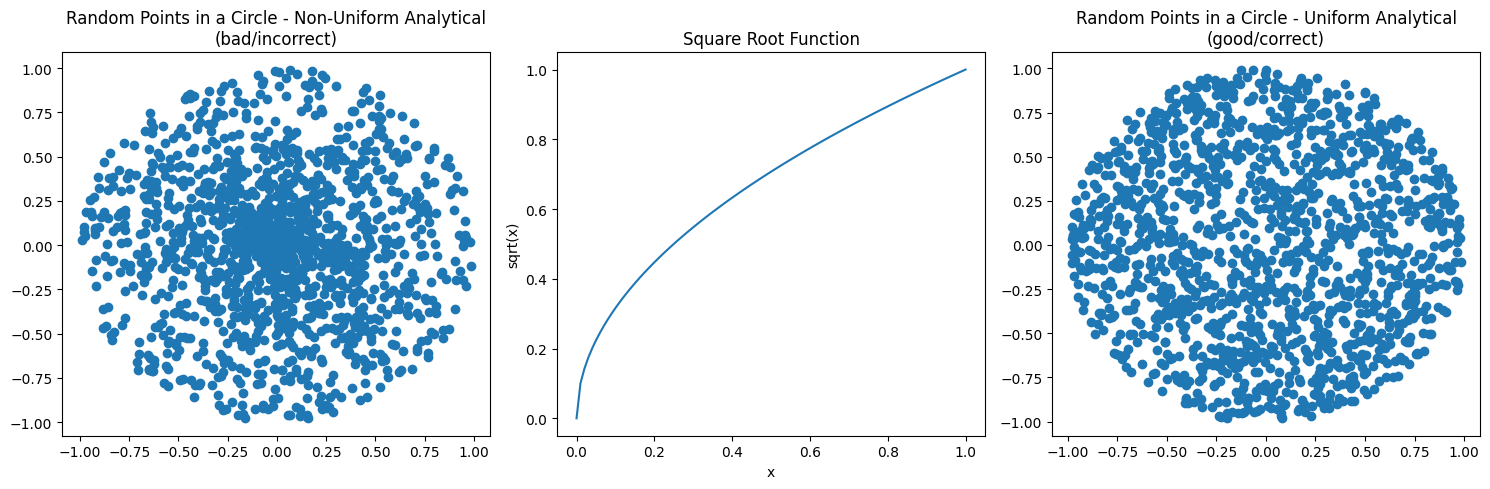

In [ ]:
# (1) Do a bad radial generation (clusters in center)
bad_rand_r = np.random.uniform(0, 1, num_points)
bad_rand_theta = np.random.uniform(0, (2 * np.pi), num_points)

# Transform from radial to cartesian
bad_rand_x = bad_rand_r * np.cos(bad_rand_theta)
bad_rand_y = bad_rand_r * np.sin(bad_rand_theta)



# (2) The square root function can be used to adjust the distribtuion to not cluster the center
sqrt_x = np.linspace(0, 1, 100)
sqrt_y = np.sqrt(sqrt_x)



# (3) Use a proper analytical method
rand_r = np.random.uniform(0, 1, num_points)
rand_r = np.sqrt(rand_r)   # square root all of the values
rand_theta = np.random.uniform(0, (2 * np.pi), num_points)

# Transform from radial to cartesian
rand_x = rand_r * np.cos(rand_theta)
rand_y = rand_r * np.sin(rand_theta)



# Visualize the data
fig, diagrams = plt.subplots(1, 3, figsize=(15, 5))

# Bad Radial distribution (too clustered in the center)
diagrams[0].scatter(bad_rand_x, bad_rand_y)
diagrams[0].set_title('Random Points in a Circle - Non-Uniform Analytical\n(bad/incorrect)')

# The square root function
diagrams[1].plot(sqrt_x, sqrt_y)
diagrams[1].set_title('Square Root Function')
diagrams[1].set_xlabel('x')
diagrams[1].set_ylabel('sqrt(x)')

# Random 2D points in a cicrcle (analytical)
diagrams[2].scatter(rand_x, rand_y)
diagrams[2].set_title('Random Points in a Circle - Uniform Analytical\n(good/correct)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## In the 3D case

In [ ]:
# Finding out what the statistical average that a point lies within a unit sphere
# also has the same methodology,
#     s = (side of a cube)
#   V_c (square) = s^3
#
#     r = s / 2
#   V_s (sphere) = (4/3) * pi * r^3
#
#   Prob = V_s  / V_c
#

s = 1
r = s / 2

V_c = s**3

V_s = (4/3) * np.pi * r**3

prob = V_s / V_c
prob = prob * 100
print(f'The probability that a point lies within a unit sphere, using rejeciton sampling is {prob:0.5}%')

The probability that a point lies within a unit sphere, using rejeciton sampling is 52.36%


In [ ]:
# Make a sample of points in a sphere (using rejection sampling)
rand_x = np.random.uniform(-1, 1, num_points)
rand_y = np.random.uniform(-1, 1, num_points)
rand_z = np.random.uniform(-1, 1, num_points)
x_accepted = []
y_accepted = []
z_accepted = []
x_rejected = []
y_rejected = []
z_rejected = []
colors = []

def distance_3d(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

num_tossed = 0
for x, y, z in zip(rand_x, rand_y, rand_z):
    if (distance_3d(x, y, z) <= 1):
        x_accepted.append(x)
        y_accepted.append(y)
        z_accepted.append(z)
        colors.append('dodgerblue')
    else:
        x_rejected.append(x)
        y_rejected.append(y)
        z_rejected.append(z)
        colors.append('firebrick')

num_tossed = len(x_rejected)
rejection_rate = (num_tossed / num_points) * 100
print(f'Had to throw out {num_tossed} points ({rejection_rate:0.5}%)')

Had to throw out 722 points (48.133%)


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig_in_sphere = go.Figure(data=[go.Scatter3d(
    x=x_accepted,
    y=y_accepted,
    z=z_accepted,
    mode='markers',
    marker=dict(size=4, color='cornflowerblue')
)])
fig_combined = go.Figure(data=[go.Scatter3d(
    x=rand_x,
    y=rand_y,
    z=rand_z,
    mode='markers',
    marker=dict(size=4, color=colors)
)])
#fig_outside_sphere = go.Figure(data=[go.Scatter3d(
#    x=x_rejected,
#    y=y_rejected,
#    z=z_rejected,
#    mode='markers',
#    marker=dict(size=4, color='firebrick')
#)])

# Make the grouped plot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])
#fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]])

fig.add_trace(fig_in_sphere.data[0],      row=1, col=1)
fig.add_trace(fig_combined.data[0],       row=1, col=2)
#fig.add_trace(fig_outside_sphere.data[0], row=1, col=3)

# Update the layout of the subplot
fig.update_layout(
    title_text='Points inside (and out) of a Sphere using Rejection sampling',
    showlegend=False
)

# Display the plots
fig.show()

In [ ]:
# The proper analytical method for the 3D case.
# The algorithm for this has been adapted from here:
#   https://karthikkaranth.me/blog/generating-random-points-in-a-sphere/

rand_r = np.random.uniform(0, 1, num_points)
rand_r = np.cbrt(rand_r)        # 3D case uses a cube root
rand_theta = np.random.uniform(0, (2 * np.pi), num_points)
#rand_phi = np.random.uniform(0, 2, num_points) - 1      # Note this was the original line
rand_phi = np.random.uniform(-1, 1, num_points)
rand_phi = np.arccos(rand_phi)

sin_theta = np.sin(rand_theta)
cos_theta = np.cos(rand_theta)
sin_phi = np.sin(rand_phi)
cos_phi = np.cos(rand_phi)

rand_x = rand_r * sin_phi * cos_theta
rand_y = rand_r * sin_phi * sin_theta
rand_z = rand_r * cos_phi

fig_in_sphere_analytical = go.Figure(data=[go.Scatter3d(
    x=rand_x,
    y=rand_y,
    z=rand_z,
    mode='markers',
    marker=dict(size=4, color='cornflowerblue')
)])

fig_in_sphere_analytical.update_layout(
    title_text='Points inside a Sphere using Analytical Method',
    showlegend=False
)